# Spatial resolution

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import pandas as pd
from pathlib import Path
import seaborn as sns
sns.reset_orig()

In [2]:
from gprof_nn.plotting import set_style
from gprof_nn.validation import get_colors
set_style(latex=True)
COLORS = get_colors()

In [3]:
path = Path("/home/simonpf/data/gprof_nn/validation/gmi")
groups = ["gprof_v5", "gprof_v7", "gprof_nn_1d", "gprof_nn_3d", "gprof_nn_hr", "combined"]
results_conus = {group: xr.load_dataset(path / f"er_{group}.nc") for group in groups[:-1]}
results_conus_cmb = {group: xr.load_dataset(path / f"er_cmb_{group}.nc") for group in groups}
results_kwaj = {group: xr.load_dataset(path / f"er_kwaj_{group}.nc") for group in groups[:-1]}
results_kwaj_cmb = {group: xr.load_dataset(path / f"er_kwaj_cmb_{group}.nc") for group in groups}

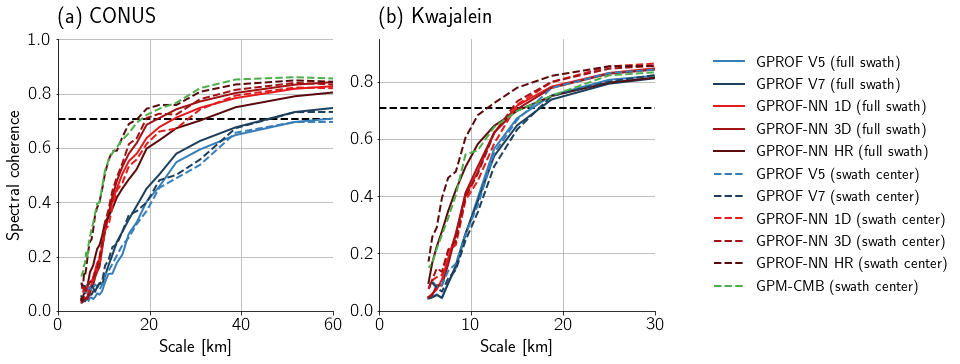

In [7]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(14, 5))
gs = GridSpec(1, 3, width_ratios=[1.0, 1.0, 0.5])

#
# Conus
#

ax = f.add_subplot(gs[0, 0])

x = results_conus["gprof_v5"].scales / 1e3
ax.axhline(np.sqrt(0.5), c="k", ls="--")
y_gprof_v5 = results_conus["gprof_v5"].coherence
y_gprof_v7 = results_conus["gprof_v7"].coherence
y_gprof_nn_1d = results_conus["gprof_nn_1d"].coherence
y_gprof_nn_3d = results_conus["gprof_nn_3d"].coherence
y_gprof_nn_hr = results_conus["gprof_nn_hr"].coherence
ax.plot(x, y_gprof_v5, c=COLORS["gprof_v5"])
ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"])
ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"])
ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"])
ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"])

y_gprof_v5 = results_conus_cmb["gprof_v5"].coherence
y_gprof_v7 = results_conus_cmb["gprof_v7"].coherence
y_gprof_nn_1d = results_conus_cmb["gprof_nn_1d"].coherence
y_gprof_nn_3d = results_conus_cmb["gprof_nn_3d"].coherence
y_gprof_nn_hr = results_conus_cmb["gprof_nn_hr"].coherence
y_cmb = results_conus_cmb["combined"].coherence
ax.plot(x, y_gprof_v5, c=COLORS["gprof_v5"], ls="--")
ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"], ls="--")
ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"], ls="--")
ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"], ls="--")
ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"], ls="--")
ax.plot(x, y_cmb, c=COLORS["combined"], ls="--")

ax.set_xlim([0, 60])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Scale [km]")
ax.set_ylabel("Spectral coherence")
ax.set_title("(a) CONUS", loc="left")

#
# Kwajalein
#

ax = f.add_subplot(gs[0, 1])
handles_full = []
handles_center = []

x = results_kwaj["gprof_v5"].scales / 1e3

ax.axhline(np.sqrt(0.5), c="k", ls="--")
y_gprof_v5 = results_kwaj["gprof_v5"].coherence
y_gprof_v7 = results_kwaj["gprof_v7"].coherence
y_gprof_nn_1d = results_kwaj["gprof_nn_1d"].coherence
y_gprof_nn_3d = results_kwaj["gprof_nn_3d"].coherence
y_gprof_nn_hr = results_kwaj["gprof_nn_hr"].coherence
handles_full += ax.plot(x, y_gprof_v5, c=COLORS["gprof_v5"], label="GPROF V5 (full swath)")
handles_full += ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"], label="GPROF V7 (full swath)")
handles_full += ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"], label="GPROF-NN 1D (full swath)")
handles_full += ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"], label="GPROF-NN 3D (full swath)")
handles_full += ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"], label="GPROF-NN HR (full swath)")

y_gprof_v5 = results_kwaj_cmb["gprof_v5"].coherence
y_gprof_v7 = results_kwaj_cmb["gprof_v7"].coherence
y_gprof_nn_1d = results_kwaj_cmb["gprof_nn_1d"].coherence
y_gprof_nn_3d = results_kwaj_cmb["gprof_nn_3d"].coherence
y_gprof_nn_hr = results_kwaj_cmb["gprof_nn_hr"].coherence
y_cmb = results_kwaj_cmb["combined"].coherence
handles_center += ax.plot(x, y_gprof_v5, c=COLORS["gprof_v5"], ls="--", label="GPROF V5 (swath center)")
handles_center += ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"], ls="--", label="GPROF V7 (swath center)")
handles_center += ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"], ls="--", label="GPROF-NN 1D (swath center)")
handles_center += ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"], ls="--", label="GPROF-NN 3D (swath center)")
handles_center += ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"], ls="--", label="GPROF-NN HR (swath center)")
handles_center += ax.plot(x, y_cmb, c=COLORS["combined"], ls="--", label="GPM-CMB (swath center)")

ax.set_xlim([0, 30])
ax.set_xlabel("Scale [km]")
ax.set_title("(b) Kwajalein", loc="left")

ax = f.add_subplot(gs[0, 2])
ax.set_axis_off()
ax.legend(handles=handles_full + handles_center, loc="center left", ncol=1)
#ax = f.add_subplot(gs[0, 3])
#ax.set_axis_off()
#ax.legend(handles=handles_center, loc="lower center", ncol=1)

f.savefig(
    "../../plots/validation/effective_resolution_gmi.pdf", 
    bbox_inches="tight"
)
f.savefig(
    "../../plots/validation/effective_resolution_gmi.svg", 
    bbox_inches="tight"
)

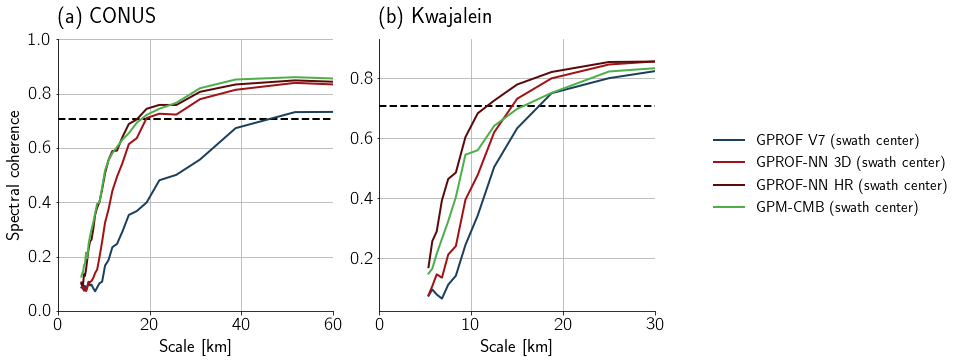

In [5]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(14, 5))
gs = GridSpec(1, 3, width_ratios=[1.0, 1.0, 0.5])

#
# Conus
#

ax = f.add_subplot(gs[0, 0])

x = results_conus["gprof_v5"].scales / 1e3
ax.axhline(np.sqrt(0.5), c="k", ls="--")

y_gprof_v7 = results_conus_cmb["gprof_v7"].coherence
y_gprof_nn_3d = results_conus_cmb["gprof_nn_3d"].coherence
y_gprof_nn_hr = results_conus_cmb["gprof_nn_hr"].coherence
y_cmb = results_conus_cmb["combined"].coherence
ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"])
ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"])
ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"])
ax.plot(x, y_cmb, c=COLORS["combined"])

ax.set_xlim([0, 60])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Scale [km]")
ax.set_ylabel("Spectral coherence")
ax.set_title("(a) CONUS", loc="left")

#
# Kwajalein
#

ax = f.add_subplot(gs[0, 1])
handles_full = []
handles_center = []

x = results_kwaj["gprof_v5"].scales / 1e3

ax.axhline(np.sqrt(0.5), c="k", ls="--")
#y_gprof_v5 = results_kwaj["gprof_v5"].coherence
y_gprof_v7 = results_kwaj["gprof_v7"].coherence
#y_gprof_nn_1d = results_kwaj["gprof_nn_1d"].coherence
y_gprof_nn_3d = results_kwaj["gprof_nn_3d"].coherence
y_gprof_nn_hr = results_kwaj["gprof_nn_hr"].coherence
#handles_full += ax.plot(x, y_gprof_v5, c=COLORS["gprof_v5"], label="GPROF V5 (full swath)")
#handles_full += ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"], label="GPROF V7 (full swath)")
#handles_full += ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"], label="GPROF-NN 1D (full swath)")
#handles_full += ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"], label="GPROF-NN 3D (full swath)")
#handles_full += ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"], label="GPROF-NN HR (full swath)")

y_gprof_v5 = results_kwaj_cmb["gprof_v5"].coherence
y_gprof_v7 = results_kwaj_cmb["gprof_v7"].coherence
y_gprof_nn_1d = results_kwaj_cmb["gprof_nn_1d"].coherence
y_gprof_nn_3d = results_kwaj_cmb["gprof_nn_3d"].coherence
y_gprof_nn_hr = results_kwaj_cmb["gprof_nn_hr"].coherence
y_cmb = results_kwaj_cmb["combined"].coherence
#handles_center += ax.plot(x, y_gprof_v5, c=COLORS["gprof_v5"], ls="--", label="GPROF V5 (swath center)")
handles_center += ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"], label="GPROF V7 (swath center)")
#handles_center += ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"], ls="--", label="GPROF-NN 1D (swath center)")
handles_center += ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"], label="GPROF-NN 3D (swath center)")
handles_center += ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"], label="GPROF-NN HR (swath center)")
handles_center += ax.plot(x, y_cmb, c=COLORS["combined"], label="GPM-CMB (swath center)")

ax.set_xlim([0, 30])
ax.set_xlabel("Scale [km]")
ax.set_title("(b) Kwajalein", loc="left")

ax = f.add_subplot(gs[0, 2])
ax.set_axis_off()
ax.legend(handles=handles_full + handles_center, loc="center left", ncol=1)
#ax = f.add_subplot(gs[0, 3])
#ax.set_axis_off()
#ax.legend(handles=handles_center, loc="lower center", ncol=1)

f.savefig(
    "../../plots/validation/effective_resolution_gmi_center.pdf", 
    bbox_inches="tight"
)
f.savefig(
    "../../plots/validation/effective_resolution_gmi_center.svg", 
    bbox_inches="tight"
)

## New data augmentation

In [31]:
path = Path("/home/simonpf/data_3/gprof_nn/validation")
groups = ["gprof_v5", "gprof_v7", "gprof_nn_1d", "gprof_nn_3d", "gprof_nn_hr", "combined"]
results_conus = {group: xr.load_dataset(path / f"er_rot_{group}.nc") for group in groups[:-1]}
results_conus_cmb = {group: xr.load_dataset(path / f"er_rot_cmb_{group}.nc") for group in groups}

In [27]:
path = Path("/home/simonpf/data_3/gprof_nn/validation")
groups = ["gprof_v5", "gprof_v7", "gprof_nn_1d", "gprof_nn_3d", "gprof_nn_hr", "combined"]
results_conus = {group: xr.load_dataset(path / f"er_{group}.nc") for group in groups[:-1]}
results_conus_cmb = {group: xr.load_dataset(path / f"er_cmb_{group}.nc") for group in groups}

/tmp/ipykernel_1788162/2947490022.py:48: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fa80aabd0a0> has a label of '_child5' which cannot be automatically added to the legend.
  ax.legend(handles=handles_full + handles_center, loc="center left", ncol=1)


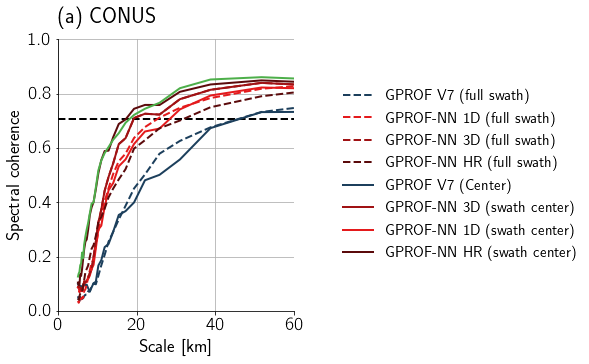

In [29]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(7, 5))
gs = GridSpec(1, 2, width_ratios=[1.0, 0.5])

#
# Conus
#

ax = f.add_subplot(gs[0, 0])

x = results_conus_cmb["gprof_v7"].scales / 1e3
ax.axhline(np.sqrt(0.5), c="k", ls="--")


y_gprof_v7 = results_conus_cmb["gprof_v7"].coherence
y_gprof_nn_3d = results_conus_cmb["gprof_nn_3d"].coherence
y_gprof_nn_1d = results_conus_cmb["gprof_nn_1d"].coherence
y_gprof_nn_hr = results_conus_cmb["gprof_nn_hr"].coherence
#y_cmb = results_conus_cmb["combined"].coherence

handles_center = []
handles_center += ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"], label="GPROF V7 (Center)")
handles_center += ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"], label="GPROF-NN 3D (swath center)")
handles_center += ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"], label="GPROF-NN 1D (swath center)")
handles_center += ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"], label="GPROF-NN HR (swath center)")
handles_center += ax.plot(x, y_cmb, c=COLORS["combined"])

x = results_conus["gprof_v7"].scales / 1e3
y_gprof_v7 = results_conus["gprof_v7"].coherence
#y_gprof_nn_3d = results_conus["gprof_nn_3d"].coherence
y_gprof_nn_1d = results_conus["gprof_nn_1d"].coherence
y_gprof_nn_hr = results_conus["gprof_nn_hr"].coherence

handles_full = []
handles_full += ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"], ls="--", label="GPROF V7 (full swath)")
handles_full += ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"], ls="--", label="GPROF-NN 1D (full swath)")
handles_full += ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"], ls="--", label="GPROF-NN 3D (full swath)")
handles_full += ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"], ls="--", label="GPROF-NN HR (full swath)")

ax.set_xlim([0, 60])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Scale [km]")
ax.set_ylabel("Spectral coherence")
ax.set_title("(a) CONUS", loc="left")

ax = f.add_subplot(gs[0, 1])
ax.set_axis_off()
ax.legend(handles=handles_full + handles_center, loc="center left", ncol=1)
#ax = f.add_subplot(gs[0, 3])
#ax.set_axis_off()
#ax.legend(handles=handles_center, loc="lower center", ncol=1)

f.savefig(
    "../../plots/validation/effective_resolution_rot.pdf", 
    bbox_inches="tight"
)


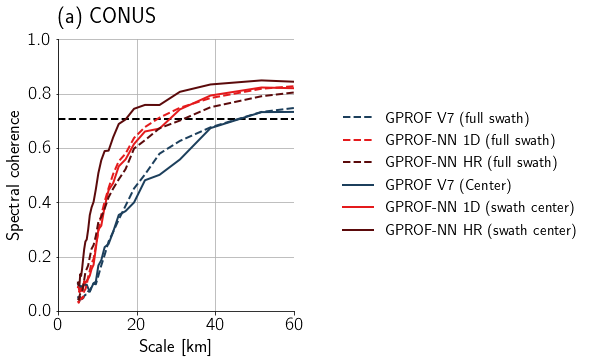

In [30]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(7, 5))
gs = GridSpec(1, 2, width_ratios=[1.0, 0.5])

#
# Conus
#

ax = f.add_subplot(gs[0, 0])

x = results_conus_cmb["gprof_v7"].scales / 1e3
ax.axhline(np.sqrt(0.5), c="k", ls="--")


y_gprof_v7 = results_conus_cmb["gprof_v7"].coherence
y_gprof_nn_3d = results_conus_cmb["gprof_nn_3d"].coherence
y_gprof_nn_1d = results_conus_cmb["gprof_nn_1d"].coherence
y_gprof_nn_hr = results_conus_cmb["gprof_nn_hr"].coherence
y_cmb = results_conus_cmb["combined"].coherence

handles_center = []
handles_center += ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"], label="GPROF V7 (Center)")
#handles_center += ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"], label="GPROF-NN 3D (swath center)")
handles_center += ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"], label="GPROF-NN 1D (swath center)")
handles_center += ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"], label="GPROF-NN HR (swath center)")
#handles_center += ax.plot(x, y_cmb, c=COLORS["combined"])

x = results_conus["gprof_v7"].scales / 1e3
y_gprof_v7 = results_conus["gprof_v7"].coherence
y_gprof_nn_3d = results_conus["gprof_nn_3d"].coherence
y_gprof_nn_1d = results_conus["gprof_nn_1d"].coherence
y_gprof_nn_hr = results_conus["gprof_nn_hr"].coherence

handles_full = []
handles_full += ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"], ls="--", label="GPROF V7 (full swath)")
handles_full += ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"], ls="--", label="GPROF-NN 1D (full swath)")
#handles_full += ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"], ls="--", label="GPROF-NN 3D (full swath)")
handles_full += ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"], ls="--", label="GPROF-NN HR (full swath)")

ax.set_xlim([0, 60])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Scale [km]")
ax.set_ylabel("Spectral coherence")
ax.set_title("(a) CONUS", loc="left")

ax = f.add_subplot(gs[0, 1])
ax.set_axis_off()
ax.legend(handles=handles_full + handles_center, loc="center left", ncol=1)
#ax = f.add_subplot(gs[0, 3])
#ax.set_axis_off()
#ax.legend(handles=handles_center, loc="lower center", ncol=1)

f.savefig(
    "../../plots/validation/effective_resolution.pdf", 
    bbox_inches="tight"
)

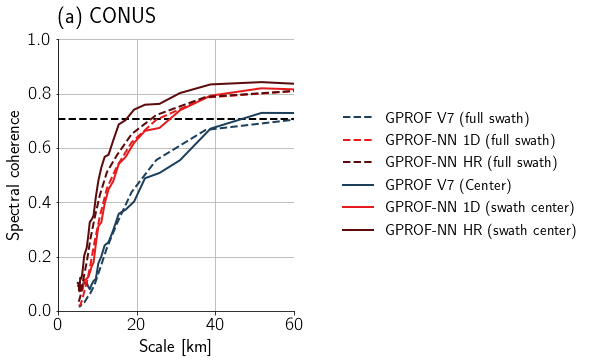

In [32]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(7, 5))
gs = GridSpec(1, 2, width_ratios=[1.0, 0.5])

#
# Conus
#

ax = f.add_subplot(gs[0, 0])

x = results_conus_cmb["gprof_v7"].scales / 1e3
ax.axhline(np.sqrt(0.5), c="k", ls="--")


y_gprof_v7 = results_conus_cmb["gprof_v7"].coherence
y_gprof_nn_3d = results_conus_cmb["gprof_nn_3d"].coherence
y_gprof_nn_1d = results_conus_cmb["gprof_nn_1d"].coherence
y_gprof_nn_hr = results_conus_cmb["gprof_nn_hr"].coherence
y_cmb = results_conus_cmb["combined"].coherence

handles_center = []
handles_center += ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"], label="GPROF V7 (Center)")
#handles_center += ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"], label="GPROF-NN 3D (swath center)")
handles_center += ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"], label="GPROF-NN 1D (swath center)")
handles_center += ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"], label="GPROF-NN HR (swath center)")
#handles_center += ax.plot(x, y_cmb, c=COLORS["combined"])

x = results_conus["gprof_v7"].scales / 1e3
y_gprof_v7 = results_conus["gprof_v7"].coherence
y_gprof_nn_3d = results_conus["gprof_nn_3d"].coherence
y_gprof_nn_1d = results_conus["gprof_nn_1d"].coherence
y_gprof_nn_hr = results_conus["gprof_nn_hr"].coherence

handles_full = []
handles_full += ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"], ls="--", label="GPROF V7 (full swath)")
handles_full += ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"], ls="--", label="GPROF-NN 1D (full swath)")
#handles_full += ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"], ls="--", label="GPROF-NN 3D (full swath)")
handles_full += ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"], ls="--", label="GPROF-NN HR (full swath)")

ax.set_xlim([0, 60])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Scale [km]")
ax.set_ylabel("Spectral coherence")
ax.set_title("(a) CONUS", loc="left")

ax = f.add_subplot(gs[0, 1])
ax.set_axis_off()
ax.legend(handles=handles_full + handles_center, loc="center left", ncol=1)
#ax = f.add_subplot(gs[0, 3])
#ax.set_axis_off()
#ax.legend(handles=handles_center, loc="lower center", ncol=1)

f.savefig(
    "../../plots/validation/effective_resolution_rot.pdf", 
    bbox_inches="tight"
)

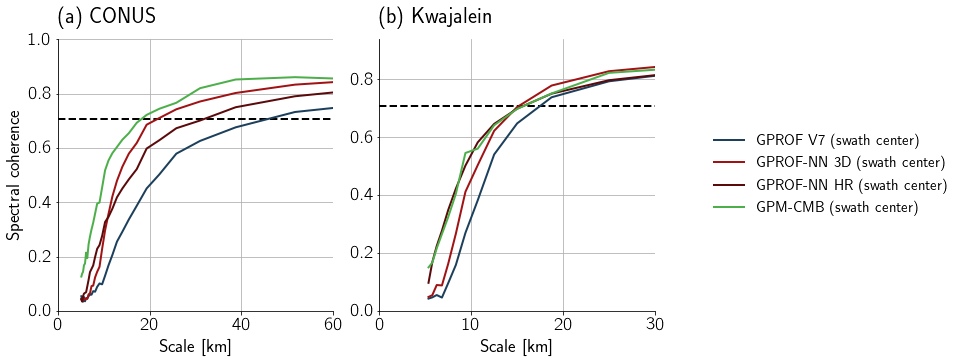

In [10]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(14, 5))
gs = GridSpec(1, 3, width_ratios=[1.0, 1.0, 0.5])

#
# Conus
#

ax = f.add_subplot(gs[0, 0])

x = results_conus["gprof_v5"].scales / 1e3
ax.axhline(np.sqrt(0.5), c="k", ls="--")

y_gprof_v7 = results_conus["gprof_v7"].coherence
y_gprof_nn_3d = results_conus["gprof_nn_3d"].coherence
y_gprof_nn_hr = results_conus["gprof_nn_hr"].coherence
y_cmb = results_conus_cmb["combined"].coherence
ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"])
ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"])
ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"])
ax.plot(x, y_cmb, c=COLORS["combined"])

ax.set_xlim([0, 60])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Scale [km]")
ax.set_ylabel("Spectral coherence")
ax.set_title("(a) CONUS", loc="left")

#
# Kwajalein
#

ax = f.add_subplot(gs[0, 1])
handles_full = []
handles_center = []

x = results_kwaj["gprof_v5"].scales / 1e3

ax.axhline(np.sqrt(0.5), c="k", ls="--")
#y_gprof_v5 = results_kwaj["gprof_v5"].coherence
y_gprof_v7 = results_kwaj["gprof_v7"].coherence
#y_gprof_nn_1d = results_kwaj["gprof_nn_1d"].coherence
y_gprof_nn_3d = results_kwaj["gprof_nn_3d"].coherence
y_gprof_nn_hr = results_kwaj["gprof_nn_hr"].coherence
#handles_full += ax.plot(x, y_gprof_v5, c=COLORS["gprof_v5"], label="GPROF V5 (full swath)")
#handles_full += ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"], label="GPROF V7 (full swath)")
#handles_full += ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"], label="GPROF-NN 1D (full swath)")
#handles_full += ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"], label="GPROF-NN 3D (full swath)")
#handles_full += ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"], label="GPROF-NN HR (full swath)")

y_gprof_v5 = results_kwaj_cmb["gprof_v5"].coherence
y_gprof_v7 = results_kwaj["gprof_v7"].coherence
y_gprof_nn_1d = results_kwaj_cmb["gprof_nn_1d"].coherence
y_gprof_nn_3d = results_kwaj["gprof_nn_3d"].coherence
y_gprof_nn_hr = results_kwaj["gprof_nn_hr"].coherence
y_cmb = results_kwaj_cmb["combined"].coherence
#handles_center += ax.plot(x, y_gprof_v5, c=COLORS["gprof_v5"], ls="--", label="GPROF V5 (swath center)")
handles_center += ax.plot(x, y_gprof_v7, c=COLORS["gprof_v7"], label="GPROF V7 (swath center)")
#handles_center += ax.plot(x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"], ls="--", label="GPROF-NN 1D (swath center)")
handles_center += ax.plot(x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"], label="GPROF-NN 3D (swath center)")
handles_center += ax.plot(x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"], label="GPROF-NN HR (swath center)")
handles_center += ax.plot(x, y_cmb, c=COLORS["combined"], label="GPM-CMB (swath center)")

ax.set_xlim([0, 30])
ax.set_xlabel("Scale [km]")
ax.set_title("(b) Kwajalein", loc="left")

ax = f.add_subplot(gs[0, 2])
ax.set_axis_off()
ax.legend(handles=handles_full + handles_center, loc="center left", ncol=1)
#ax = f.add_subplot(gs[0, 3])
#ax.set_axis_off()
#ax.legend(handles=handles_center, loc="lower center", ncol=1)

f.savefig(
    "../../plots/validation/effective_resolution_gmi_full_swath.pdf", 
    bbox_inches="tight"
)
f.savefig(
    "../../plots/validation/effective_resolution_gmi_full_swath.svg", 
    bbox_inches="tight"
)

In [62]:
def calc_er(results):
    x = results.scales.data / 1e3
    y = results.coherence.data
    return np.interp(1.0 / np.sqrt(2), y[::-1], x[::-1])

er_conus_v5 = calc_er(results_conus["gprof_v5"])
er_conus_v7 = calc_er(results_conus["gprof_v7"])
er_conus_nn_1d = calc_er(results_conus["gprof_nn_1d"])
er_conus_nn_3d = calc_er(results_conus["gprof_nn_3d"])
er_conus_nn_hr = calc_er(results_conus["gprof_nn_hr"])

er_conus_c_cmb = calc_er(results_conus_cmb["combined"])
er_conus_c_v5 = calc_er(results_conus_cmb["gprof_v5"])
er_conus_c_v7 = calc_er(results_conus_cmb["gprof_v7"])
er_conus_c_nn_1d = calc_er(results_conus_cmb["gprof_nn_1d"])
er_conus_c_nn_3d = calc_er(results_conus_cmb["gprof_nn_3d"])
er_conus_c_nn_hr = calc_er(results_conus_cmb["gprof_nn_hr"])

In [63]:
er_conus_v5, er_conus_v7, er_conus_nn_1d, er_conus_nn_3d, er_conus_nn_hr

(59.38160088541705,
 45.96114245195568,
 25.384917488614096,
 21.826837892347683,
 32.0265426805559)

In [65]:
er_conus_c_v5, er_conus_c_v7, er_conus_c_nn_1d, er_conus_c_nn_3d, er_conus_c_nn_hr, er_conus_c_cmb

(86.23562738145355,
 46.29963150888652,
 28.475826091689473,
 19.295983767470055,
 17.363336922693374,
 18.317641078379964)

In [84]:
er_kwaj_v5 = calc_er(results_kwaj["gprof_v5"])
er_kwaj_v7 = calc_er(results_kwaj["gprof_v7"])
er_kwaj_nn_1d = calc_er(results_kwaj["gprof_nn_1d"])
er_kwaj_nn_3d = calc_er(results_kwaj["gprof_nn_3d"])
er_kwaj_nn_hr = calc_er(results_kwaj["gprof_nn_hr"])

er_kwaj_c_cmb = calc_er(results_kwaj_cmb["combined"])
er_kwaj_c_v5 = calc_er(results_kwaj_cmb["gprof_v5"])
er_kwaj_c_v7 = calc_er(results_kwaj_cmb["gprof_v7"])
er_kwaj_c_nn_1d = calc_er(results_kwaj_cmb["gprof_nn_1d"])
er_kwaj_c_nn_3d = calc_er(results_kwaj_cmb["gprof_nn_3d"])
er_kwaj_c_nn_hr = calc_er(results_kwaj_cmb["gprof_nn_hr"])

In [85]:
er_kwaj_v5, er_kwaj_v7, er_kwaj_nn_1d, er_kwaj_nn_3d, er_kwaj_nn_hr

(16.604782300633126,
 17.46423853279651,
 14.74971837032205,
 15.138955484093424,
 15.613659274522044)

In [88]:
er_kwaj_c_v5, er_kwaj_c_v7, er_kwaj_c_nn_1d, er_kwaj_c_nn_3d, er_kwaj_c_nn_hr, er_kwaj_c_cmb

(16.35933078807972,
 17.366772305658948,
 14.766990258486153,
 14.449716168076787,
 11.718418428819191,
 15.645708004980523)

In [27]:
co_gprof_v5 = pd.read_csv("coherence_GPROF_v5_CONUS.csv").rename(columns={"x": "Coherence"})
co_gprof_v5["Algorithm"] = "gprof_v5"
co_gprof_v7 = pd.read_csv("coherence_GPROF_v7_CONUS.csv").rename(columns={"x": "Coherence"})
co_gprof_v7["Algorithm"] = "gprof_v7"
co_gprof_nn_1d = pd.read_csv("coherence_GPROF_nn1d_CONUS.csv").rename(columns={"x": "Coherence"})
co_gprof_nn_1d["Algorithm"] = "gprof_nn_1d"
co_gprof_nn_3d = pd.read_csv("coherence_GPROF_nn3d_CONUS.csv").rename(columns={"x": "Coherence"})
co_gprof_nn_3d["Algorithm"] = "gprof_nn_3d"
co_gprof_nn_hr = pd.read_csv("coherence_GPROF_nnHR_CONUS.csv").rename(columns={"x": "Coherence"})
co_gprof_nn_hr["Algorithm"] = "gprof_nn_hr"
n_conus = pd.read_csv("waven_CONUS.csv")["x"]

results_conus = pd.concat([
    co_gprof_v5,
    co_gprof_v7,
    co_gprof_nn_1d,
    co_gprof_nn_3d,
    co_gprof_nn_hr
])

In [31]:
co_gprof_v5 = pd.read_csv("coherence_GPROF_v5_kwaj.csv").rename(columns={"x": "Coherence"})
co_gprof_v5["Algorithm"] = "gprof_v5"
co_gprof_v7 = pd.read_csv("coherence_GPROF_v7_kwaj.csv").rename(columns={"x": "Coherence"})
co_gprof_v7["Algorithm"] = "gprof_v7"
co_gprof_nn_1d = pd.read_csv("coherence_GPROF_nn1d_kwaj.csv").rename(columns={"x": "Coherence"})
co_gprof_nn_1d["Algorithm"] = "gprof_nn_1d"
co_gprof_nn_3d = pd.read_csv("coherence_GPROF_nn3d_kwaj.csv").rename(columns={"x": "Coherence"})
co_gprof_nn_3d["Algorithm"] = "gprof_nn_3d"
co_gprof_nn_hr = pd.read_csv("coherence_GPROF_nnHR_kwaj.csv").rename(columns={"x": "Coherence"})
co_gprof_nn_hr["Algorithm"] = "gprof_nn_hr"
n_kwaj = pd.read_csv("waven_kwaj.csv")["x"]

results_kwaj = pd.concat([
    co_gprof_v5,
    co_gprof_v7,
    co_gprof_nn_1d,
    co_gprof_nn_3d,
    co_gprof_nn_hr
])

In [25]:
y_gprof_v5["x"]

,Unnamed: 0,x,Algorithm
0,1,0.810520,gprof_v5
1,2,0.766117,gprof_v5
2,3,0.735884,gprof_v5
3,4,0.717389,gprof_v5
4,5,0.702857,gprof_v5
...,...,...,...
72,73,0.011360,gprof_v5
73,74,0.011213,gprof_v5
74,75,0.012697,gprof_v5
75,76,0.013721,gprof_v5


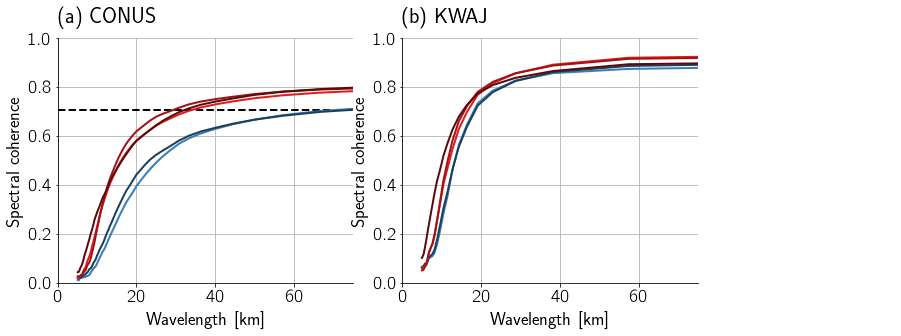

In [33]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(15, 4.5))
gs = GridSpec(1, 3, width_ratios=[1.0, 1.0, 0.5])

#
# Conus
#

ax = f.add_subplot(gs[0, 0])

x = 1 / n_conus
ax.axhline(np.sqrt(0.5), c="k", ls="--")
y_gprof_v5 = results_conus[results_conus["Algorithm"] == "gprof_v5"]["Coherence"]
y_gprof_v7 = results_conus[results_conus["Algorithm"] == "gprof_v7"]["Coherence"]
y_gprof_nn_1d = results_conus[results_conus["Algorithm"] == "gprof_nn_1d"]["Coherence"]
y_gprof_nn_3d = results_conus[results_conus["Algorithm"] == "gprof_nn_3d"]["Coherence"]
y_gprof_nn_hr = results_conus[results_conus["Algorithm"] == "gprof_nn_hr"]["Coherence"]
ax.plot(0.5 * x, y_gprof_v5, c=COLORS["gprof_v5"])
ax.plot(0.5 * x, y_gprof_v7, c=COLORS["gprof_v7"])
ax.plot(0.5 * x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"])
ax.plot(0.5 * x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"])
ax.plot(0.5 * x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"])
ax.set_xlim([0, 75])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Wavelength [km]")
ax.set_ylabel("Spectral coherence")
ax.set_title("(a) CONUS", loc="left")

#
# Kwajalein
#

ax = f.add_subplot(gs[0, 1])
handles = []

x = 1 / n_kwaj
y_gprof_v5 = results_kwaj[results_kwaj["Algorithm"] == "gprof_v5"]["Coherence"]
y_gprof_v7 = results_kwaj[results_kwaj["Algorithm"] == "gprof_v7"]["Coherence"]
y_gprof_nn_1d = results_kwaj[results_kwaj["Algorithm"] == "gprof_nn_1d"]["Coherence"]
y_gprof_nn_3d = results_kwaj[results_kwaj["Algorithm"] == "gprof_nn_3d"]["Coherence"]
y_gprof_nn_hr = results_kwaj[results_kwaj["Algorithm"] == "gprof_nn_hr"]["Coherence"]
ax.plot(0.5 * x, y_gprof_v5, c=COLORS["gprof_v5"])
ax.plot(0.5 * x, y_gprof_v7, c=COLORS["gprof_v7"])
ax.plot(0.5 * x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"])
ax.plot(0.5 * x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"])
ax.plot(0.5 * x, y_gprof_nn_hr, c=COLORS["gprof_nn_hr"])
ax.set_xlim([0, 75])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Wavelength [km]")
ax.set_ylabel("Spectral coherence")
ax.set_title("(b) KWAJ", loc="left")

ax = f.add_subplot(gs[0, 2])
ax.set_axis_off()
ax.legend(handles=handles, loc="center")
f.savefig(
    "../../plots/validation/effective_resolution_gmi.pdf", 
    bbox_inches="tight"
)
f.savefig(
    "../../plots/validation/effective_resolution_gmi.svg", 
    bbox_inches="tight"
)

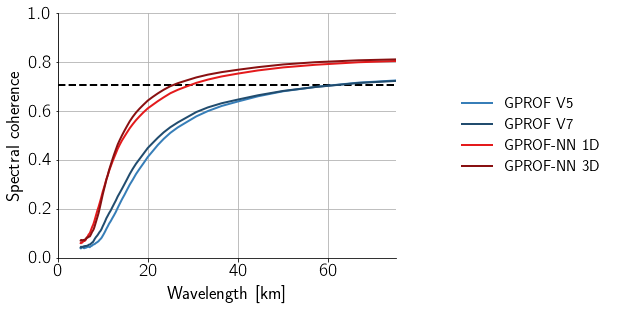

In [5]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(10, 4.5))
gs = GridSpec(1, 2, width_ratios=[1.0, 0.5])

#
# Conus
#

ax = f.add_subplot(gs[0, 0])

x = 1 / data_conus["wavenumber"]
ax.axhline(np.sqrt(0.5), c="k", ls="--")
y_gprof_v5 = data_conus["v5"]
y_gprof_v7 = data_conus["v7"]
y_gprof_nn_1d = data_conus["nn1d"]
y_gprof_nn_3d = data_conus["nn3d"]
ax.plot(0.5 * x, y_gprof_v5, c=COLORS["gprof_v5"])
ax.plot(0.5 * x, y_gprof_v7, c=COLORS["gprof_v7"])
ax.plot(0.5 * x, y_gprof_nn_1d, c=COLORS["gprof_nn_1d"])
ax.plot(0.5 * x, y_gprof_nn_3d, c=COLORS["gprof_nn_3d"])
ax.set_xlim([0, 75])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("Wavelength [km]")
ax.set_ylabel("Spectral coherence")
#ax.set_title("(a) CONUS", loc="left")

ax = f.add_subplot(gs[0, 1])
ax.set_axis_off()
ax.legend(handles=handles, loc="center")

f.savefig(
    "../../plots/validation/effective_resolution_gmi_conus.svg", 
    bbox_inches="tight"
)

## Effective resolution

In [35]:
x = 1 / n_conus
y_gprof_v5 = results_conus[results_conus["Algorithm"] == "gprof_v5"]["Coherence"]
t = 1 / np.sqrt(2.0)
er_gprof_v5 = 0.5 * np.interp(t, y_gprof_v5[::-1], x[::-1])
y_gprof_v7 = results_conus[results_conus["Algorithm"] == "gprof_v7"]["Coherence"]
er_gprof_v7 = 0.5 * np.interp(t, y_gprof_v7[::-1], x[::-1])
y_gprof_nn_1d = results_conus[results_conus["Algorithm"] == "gprof_nn_1d"]["Coherence"]
er_gprof_nn_1d = 0.5 * np.interp(t, y_gprof_nn_1d[::-1], x[::-1])
y_gprof_nn_3d = results_conus[results_conus["Algorithm"] == "gprof_nn_3d"]["Coherence"]
er_gprof_nn_3d = 0.5 * np.interp(t, y_gprof_nn_3d[::-1], x[::-1])
y_gprof_nn_hr = results_conus[results_conus["Algorithm"] == "gprof_nn_hr"]["Coherence"]
er_gprof_nn_hr = 0.5 * np.interp(t, y_gprof_nn_hr[::-1], x[::-1])

retrieval = ["GPROF V5", "GPROF V7", "GPROF-NN 1D", "GPROF-NN 3D", "GPROF-NN HR"]
er_conus = [er_gprof_v5, er_gprof_v7, er_gprof_nn_1d, er_gprof_nn_3d, er_gprof_nn_hr]

x = 1 / n_kwaj
y_gprof_v5 = results_kwaj[results_kwaj["Algorithm"] == "gprof_v5"]["Coherence"]
er_gprof_v5 = 0.5 * np.interp(t, y_gprof_v5[::-1], x[::-1])
y_gprof_v7 = results_kwaj[results_kwaj["Algorithm"] == "gprof_v7"]["Coherence"]
er_gprof_v7 = 0.5 * np.interp(t, y_gprof_v7[::-1], x[::-1])
y_gprof_nn_1d = results_kwaj[results_kwaj["Algorithm"] == "gprof_nn_1d"]["Coherence"]
er_gprof_nn_1d = 0.5 * np.interp(t, y_gprof_nn_1d[::-1], x[::-1])
y_gprof_nn_3d = results_kwaj[results_kwaj["Algorithm"] == "gprof_nn_3d"]["Coherence"]
er_gprof_nn_3d = 0.5 * np.interp(t, y_gprof_nn_3d[::-1], x[::-1])
y_gprof_nn_hr = results_kwaj[results_kwaj["Algorithm"] == "gprof_nn_hr"]["Coherence"]
er_gprof_nn_hr = 0.5 * np.interp(t, y_gprof_nn_hr[::-1], x[::-1])
er_kwaj = [er_gprof_v5, er_gprof_v7, er_gprof_nn_1d, er_gprof_nn_3d, er_gprof_nn_hr]

resolution = pd.DataFrame({
    "CONUS": er_conus,
    "Kwajalein": er_kwaj
},
    index=retrieval
)


In [36]:
resolution.to_latex?

In [37]:
print(resolution.to_latex(float_format="%0.2f"))

\begin{tabular}{lrr}
\toprule
{} &  CONUS &  Kwajalein \\
\midrule
GPROF V5    &  70.57 &      18.30 \\
GPROF V7    &  74.24 &      18.60 \\
GPROF-NN 1D &  34.08 &      16.74 \\
GPROF-NN 3D &  29.36 &      15.89 \\
GPROF-NN HR &  32.26 &      15.54 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_3808730/1699788417.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(resolution.to_latex(float_format="%0.2f"))


NameError: name 'gprof_nn_1d' is not defined